# UTS / Assessment Awal

oleh: <br>
## Afrizal Ihyauddin Yafi' - 1301200362 - IF43PILCPS02

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import butter, lfilter, freqz, find_peaks
mpl.style.use(['ggplot'])

import warnings
warnings.filterwarnings('ignore')

# Ubah pada dataset Gyroscope dari rad/s menjadi derajat/s

In [ ]:
!gdown --id 1_a9GFDUy7GPkgvH0xfLCNbvzJc8VVxQV

# Baca file xlsx ke dalam dataframe
df = pd.read_csv("datasetGyroscope.csv")

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_a9GFDUy7GPkgvH0xfLCNbvzJc8VVxQV
To: /content/datasetGyroscope.csv
100% 306k/306k [00:00<00:00, 98.2MB/s]


In [ ]:
print(df.columns)

Index(['Time (s)', 'X (rad/s)', 'Y (rad/s)', 'Z (rad/s)'], dtype='object')


In [ ]:
# Tentukan kolom yang berisi data kecepatan sudut dalam rad/s
cols_rad = ["X (rad/s)", "Y (rad/s)", "Z (rad/s)"]

# Konversi kecepatan sudut dari rad/s ke derajat/s
df[cols_rad] = df[cols_rad].apply(lambda x: x * 180/np.pi)

# Rename kolom agar nama kolom menjadi jelas
df.rename(columns={"X (rad/s)": "Gyroscope X (derajat/s)", 
                   "Y (rad/s)": "Gyroscope Y (derajat/s)",
                   "Z (rad/s)": "Gyroscope Z (derajat/s)"}, inplace=True)

# Export dataframe ke file excel
df.to_csv("datasetGyroscope-final.csv", index=False)


In [ ]:
df.head(10)

,Time (s),Gyroscope X (derajat/s),Gyroscope Y (derajat/s),Gyroscope Z (derajat/s)
0,0.007382,11.559146,-4.834228,-10.848097
1,0.017427,13.318889,2.808043,-11.288650
2,0.027471,16.229855,10.201994,-20.443786
3,0.037515,20.127031,20.029410,-24.810073
4,0.047559,22.215609,31.984594,-27.994948
5,0.057604,23.267171,43.370188,-31.425550
6,0.067648,24.679784,48.578716,-31.606229
7,0.077692,25.834470,45.114946,-28.636243
8,0.087737,27.059628,37.218158,-25.857343
9,0.097781,27.872791,26.046484,-23.528622


# Nomor 3

## Linear Accelerometer

Menampilkan visualisasi hasil pengukuran Linear Accelerometer dari aplikasi Phyphox yang memiliki 3 sumbu yaitu X, Y,d an Z.

In [ ]:
# Import dataset

!gdown --id 1J568plMY7WIbeELPMJT5mEDVica5jzR3

df_LA = pd.read_csv("datasetLinear-Accelerometer.csv")

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1J568plMY7WIbeELPMJT5mEDVica5jzR3
To: /content/datasetLinear-Accelerometer.csv
100% 427k/427k [00:00<00:00, 109MB/s]


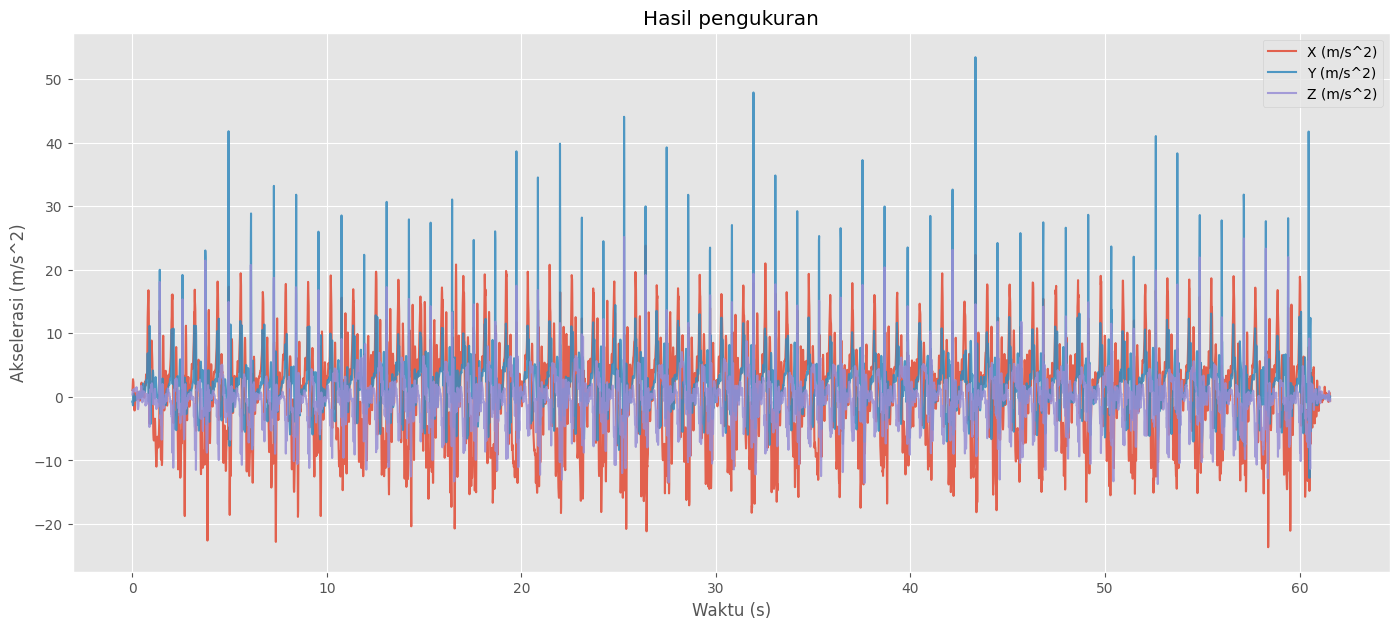

In [ ]:
df_LA.plot(x = "Time (s)", figsize = (17,7), alpha = 0.85)
plt.title("Hasil pengukuran")
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

## Gyroscope

Menampilkan visualisasi hasil pengukuran Gyroscope dari aplikasi Phyphox yang memiliki 3 sumbu yaitu X, Y,d an Z.

In [ ]:
# Import dataset

!gdown --id 1C6hv-pKXaqKYpZ982DqZ-wXM6kaJcSs8

df_Gyro = pd.read_csv("datasetLinear-Accelerometer.csv")

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1C6hv-pKXaqKYpZ982DqZ-wXM6kaJcSs8
To: /content/datasetGyroscope-final.csv
100% 420k/420k [00:00<00:00, 79.8MB/s]


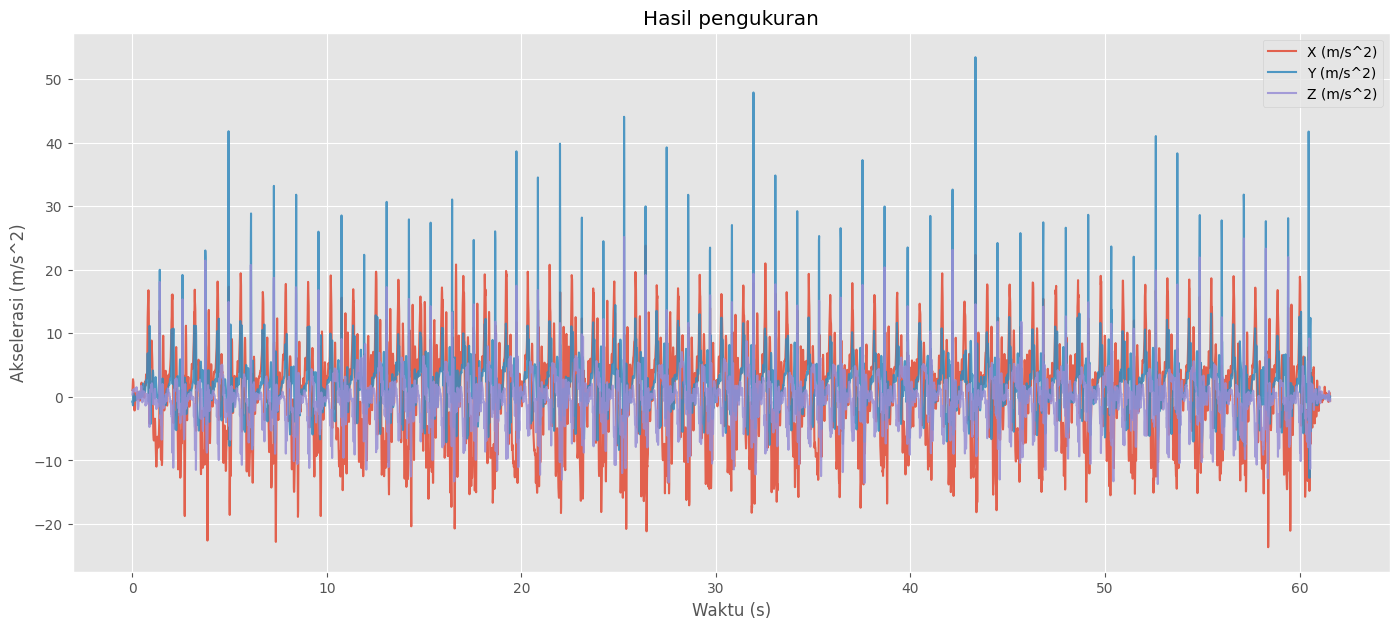

In [ ]:
df_Gyro.plot(x = "Time (s)", figsize = (17,7), alpha = 0.85)
plt.title("Hasil pengukuran")
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

# Nomor 4

In [ ]:
df_LA.head(10)

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.007382,1.077501,-0.710445,0.384445
1,0.017427,1.307896,-0.703707,0.781932
2,0.027471,2.057046,-1.169143,1.104307
3,0.037515,2.786092,-1.329444,0.906311
4,0.047559,2.578453,-0.062952,0.797757
5,0.057604,2.343499,0.521152,0.859317
6,0.067648,1.584930,-0.057379,1.109210
7,0.077692,0.376841,-0.574539,1.222610
8,0.087737,-0.739858,-0.654522,1.209367
9,0.097781,-1.372014,-0.500079,1.221382


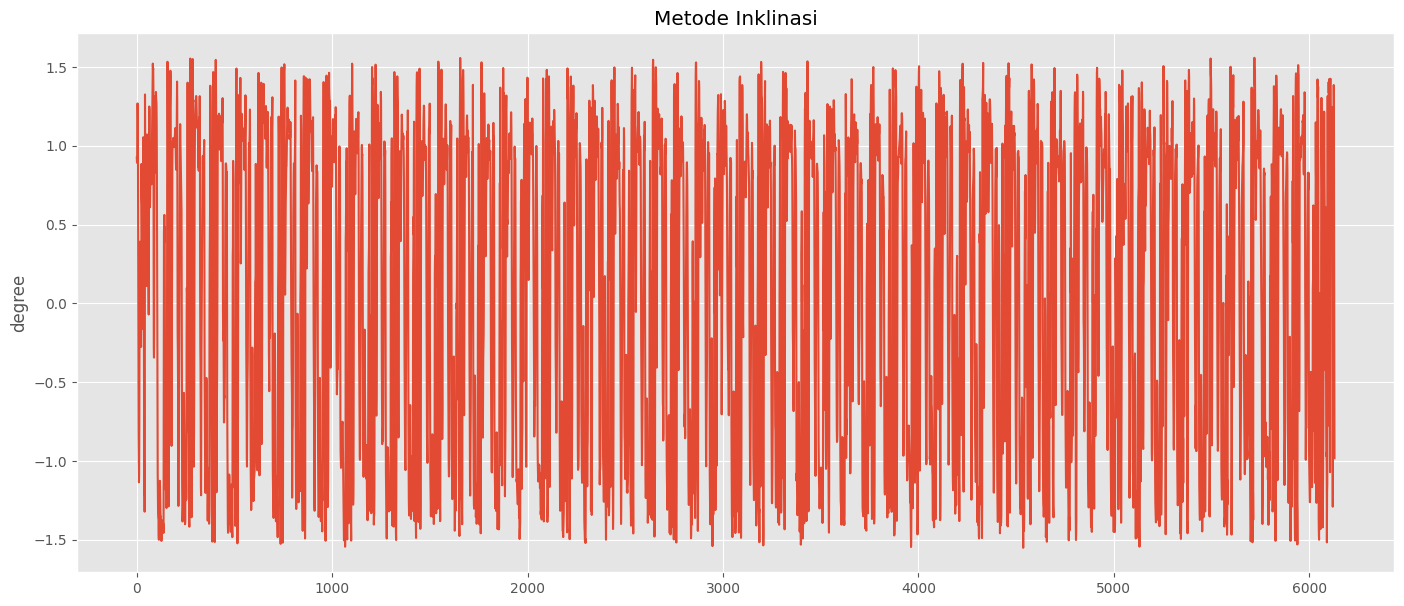

In [ ]:
rho = np.arctan(df_LA["X (m/s^2)"]/(np.sqrt(df_LA["Y (m/s^2)"]**2+df_LA["Z (m/s^2)"]**2)))
result = pd.DataFrame(rho, columns=['rho'])

plt.figure(figsize=(17,7), alpha = 0.85)
plt.title('Metode Inklinasi')
plt.plot(result)
plt.ylabel('degree')
plt.show()

# Nomor 5

## a

In [ ]:
df_Gyro.head(10)

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2)
0,0.007382,1.077501,-0.710445,0.384445
1,0.017427,1.307896,-0.703707,0.781932
2,0.027471,2.057046,-1.169143,1.104307
3,0.037515,2.786092,-1.329444,0.906311
4,0.047559,2.578453,-0.062952,0.797757
5,0.057604,2.343499,0.521152,0.859317
6,0.067648,1.584930,-0.057379,1.109210
7,0.077692,0.376841,-0.574539,1.222610
8,0.087737,-0.739858,-0.654522,1.209367
9,0.097781,-1.372014,-0.500079,1.221382


In [ ]:
# Convert gyroscope data from rad/s to deg/s
df_Gyro['X (m/s^2)'] = np.degrees(df_Gyro['X (m/s^2)'])
df_Gyro['Y (m/s^2)'] = np.degrees(df_Gyro['Y (m/s^2)'])
df_Gyro['Z (m/s^2)'] = np.degrees(df_Gyro['Z (m/s^2)'])

# Integrate gyroscope data to obtain angular position
dt = np.mean(np.diff(df['Time (s)']))  # Calculate time step
df_Gyro['Angular Position X (deg)'] = np.cumsum(df_Gyro['X (m/s^2)'] * dt)
df_Gyro['Angular Position Y (deg)'] = np.cumsum(df_Gyro['Y (m/s^2)'] * dt)
df_Gyro['Angular Position Z (deg)'] = np.cumsum(df_Gyro['Z (m/s^2)'] * dt)

df_Gyro.head(10)

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2),Angular Position X (deg),Angular Position Y (deg),Angular Position Z (deg)
0,0.007382,61.736247,-40.705494,22.027080,0.620099,-0.408859,0.221247
1,0.017427,74.936912,-40.319416,44.801391,1.372790,-0.813840,0.671247
2,0.027471,117.860050,-66.986936,63.272121,2.556614,-1.486679,1.306773
3,0.037515,159.631287,-76.171530,51.927814,4.160003,-2.251771,1.828352
4,0.047559,147.734465,-3.606901,45.708091,5.643896,-2.287999,2.287459
5,0.057604,134.272609,29.859832,49.235261,6.992573,-1.988078,2.781994
6,0.067648,90.809777,-3.287592,63.553069,7.904696,-2.021099,3.420342
7,0.077692,21.591377,-32.918673,70.050366,8.121567,-2.351745,4.123950
8,0.087737,-42.390740,-37.501355,69.291644,7.695781,-2.728421,4.819938
9,0.097781,-78.610616,-28.652418,69.980011,6.906190,-3.016215,5.522840


Keterangan:

> Program ini mengasumsikan dataset yang disimpan dalam format CSV dan memiliki 4 kolom: Time (s), Gyroscope X (rad/s), Gyroscope Y (rad/s), dan Gyroscope Z (rad/s).
> Pertama-tama, program ini mengubah data gyroscope dari rad/s menjadi deg/s menggunakan fungsi np.degrees().
> Selanjutnya, program mengintegralkan data gyroscope untuk setiap sumbu (x, y, dan z) untuk mendapatkan sudut atau derajat sudut gyroscope menggunakan fungsi np.cumsum().
> Program ini kemudian mencetak ke layar sebanyak 10 baris.

## b

In [ ]:
df_Gyro_CFA = df_Gyro

# Define High Pass Constant and Low Pass Constant
hpc = 0.8
lpc = 0.2

# Initialize previous angle and filtered angle
prev_angle = 0
filtered_angle = []

# Loop through the data
for i in range(len(df_Gyro_CFA)):
    # Calculate angle from accelerometer data
    acc_angle = np.arctan2(df_LA['Y (m/s^2)'][i], df_LA['Z (m/s^2)'][i]) * 180 / np.pi
    
    # Calculate angle from gyroscope data
    gyro_angle = df_Gyro_CFA['Angular Position X (deg)'][i] * 180 / np.pi
    
    # Calculate filtered angle
    filtered_angle.append(hpc * (prev_angle + gyro_angle) + lpc * acc_angle)
    
    # Update previous angle
    prev_angle = filtered_angle[-1]
    
# Add filtered angle to the dataframe
df_Gyro_CFA['Filtered Angle (deg)'] = filtered_angle

# Printout
df_Gyro_CFA.head(10)

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2),Angular Position X (deg),Angular Position Y (deg),Angular Position Z (deg),Filtered Angle (deg)
0,0.007382,61.736247,-40.705494,22.027080,0.620099,-0.408859,0.221247,16.107095
1,0.017427,74.936912,-40.319416,44.801391,1.372790,-0.813840,0.671247,67.412532
2,0.027471,117.860050,-66.986936,63.272121,2.556614,-1.486679,1.306773,161.789876
3,0.037515,159.631287,-76.171530,51.927814,4.160003,-2.251771,1.828352,308.968999
4,0.047559,147.734465,-3.606901,45.708091,5.643896,-2.287999,2.287459,504.969924
5,0.057604,134.272609,29.859832,49.235261,6.992573,-1.988078,2.781994,730.739018
6,0.067648,90.809777,-3.287592,63.553069,7.904696,-2.021099,3.420342,946.323541
7,0.077692,21.591377,-32.918673,70.050366,8.121567,-2.351745,4.123950,1124.290003
8,0.087737,-42.390740,-37.501355,69.291644,7.695781,-2.728421,4.819938,1246.496057
9,0.097781,-78.610616,-28.652418,69.980011,6.906190,-3.016215,5.522840,1309.300074


Solusi yang telah saya buat adalah implementasi algoritma complementary filter pada data gyroscope dan accelerometer. Algoritma complementary filter digunakan untuk mengkombinasikan data dari kedua sensor tersebut sehingga menghasilkan data yang lebih akurat.

Pada implementasi ini, data dari accelerometer digunakan untuk menghitung sudut inklinasi (acc_angle) dari sumbu Y dan Z, sedangkan data dari gyroscope digunakan untuk menghitung perubahan sudut (gyro_angle) dari sumbu X.

Kemudian, sudut inklinasi dan perubahan sudut tersebut dikombinasikan dengan menggunakan rumus complementary filter (hpc * (prev_angle + gyro_angle) + lpc * acc_angle) untuk menghasilkan sudut yang lebih akurat (filtered_angle).

Hasil dari perhitungan sudut yang telah dilakukan kemudian ditambahkan ke dalam data frame asli dengan menambahkan kolom baru bernama 'Filtered Angle (deg)'.

Dalam implementasi ini, konstanta high-pass (hpc) dan low-pass (lpc) digunakan untuk mengatur bobot dari kedua data sensor.

# c

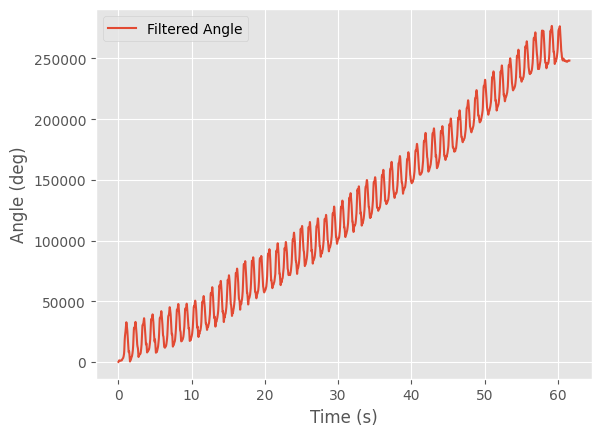

In [ ]:
# Plot the gait angle data
plt.plot(df_Gyro['Time (s)'], df_Gyro['Filtered Angle (deg)'], label='Filtered Angle')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.legend()
plt.show()

Dengan merekam gerakan tubuh selama aktivitas seperti berjalan, dapat membantu kita memahami pola gerakan tubuh, potensi cedera yang mungkin terjadi, serta memberikan informasi yang berguna dalam pemilihan program latihan atau penyesuaian program rehabilitasi. Hasil perekaman data juga dapat digunakan dalam pengembangan teknologi perangkat bantu kesehatan atau penelitian ilmiah di bidang biomekanik dan kesehatan olahraga.